In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
products = pd.read_csv(r"C:\Users\ADMIN\Downloads\Products.csv")
customers = pd.read_csv(r"C:\Users\ADMIN\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\ADMIN\Downloads\Transactions.csv")

customer_transactions = transactions.groupby('CustomerID').agg(TotalSpend=('TotalValue', 'sum'),TransactionCount=('TransactionID', 'count')).reset_index()

customer_data = pd.merge(customers, customer_transactions, on="CustomerID", how="left")

customer_data.fillna(0, inplace=True)

customer_data.head()  


,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionCount
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0


In [13]:
clustering_data = customer_data[['TotalSpend', 'TransactionCount']]

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

print(scaled_data[:5])  

[[-0.05188436  0.        ]
 [-0.86271433 -0.45129368]
 [-0.393842   -0.45129368]
 [ 1.03537505  1.35388105]
 [-0.76949861 -0.90258736]]


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

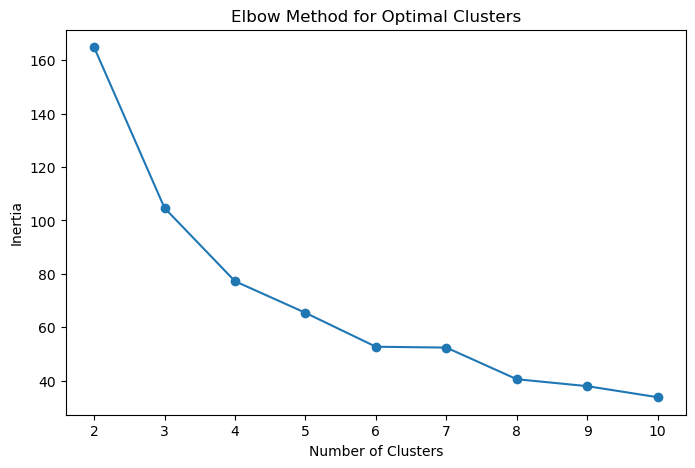

In [23]:
inertia = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)
customer_data.head()  


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,CustomerName,Region,SignupDate,TotalSpend,TransactionCount,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0,2
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0,1
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0,1
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0,1


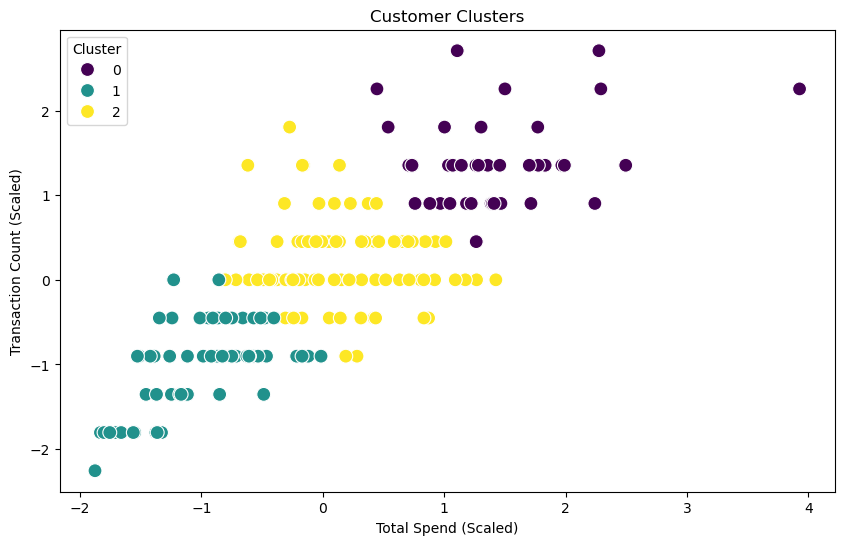

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1],hue=customer_data['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters')
plt.xlabel('Total Spend (Scaled)')
plt.ylabel('Transaction Count (Scaled)')
plt.legend(title='Cluster')
plt.show()

In [33]:
cluster_summary = customer_data.groupby('Cluster').agg(
    AvgSpend=('TotalSpend', 'mean'),
    AvgTransactions=('TransactionCount', 'mean'),
    CustomerCount=('CustomerID', 'count'))
cluster_summary

,AvgSpend,AvgTransactions,CustomerCount
Cluster,,,
0,6075.814359,8.102564,39
1,1687.641972,2.802817,71
2,3702.402444,5.388889,90


In [37]:
customer_data.to_csv("Tejas_K_Clustering.csv", index=False)
print("CSV file saved as Tejas_K_Clustering.csv")

CSV file saved as Tejas_K_Clustering.csv
